In [31]:
# ================================================================
# Unsupervised Learning: Customer Segmentation with K-Means
# SDG 12: Responsible Consumption and Production
# ================================================================
# PROBLEM STATEMENT:
# Use K-Means clustering to group customers based on Annual Income
# and Spending Score, without using any labels.
#
# Idea:
# Unsupervised learning finds patterns in data on its own.
# K-Means groups customers into clusters that behave similarly.
# This is commonly used in marketing and customer analytics.
# ================================================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# ================================================================
# 2. SIMULATED DATASET (Fast and Realistic)
# ================================================================
data = {
    "CustomerID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Age": np.random.randint(18, 70, 200),
    "Annual_Income_k": np.random.randint(15, 140, 200),
    "Spending_Score": np.random.randint(1, 100, 200)
}

df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,Annual_Income_k,Spending_Score
0,1,Female,65,64,58
1,2,Female,61,22,7
2,3,Female,61,55,57
3,4,Male,69,20,12
4,5,Male,49,83,16


In [32]:
# ================================================================
# 3. FEATURE SELECTION
# ================================================================
# Select only the columns used for clustering
X = df[["Annual_Income_k", "Spending_Score"]]


In [33]:
# ================================================================
# 4. DATA SCALING (Important for K-Means)
# ================================================================
# Scale inputs so that both features have equal importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


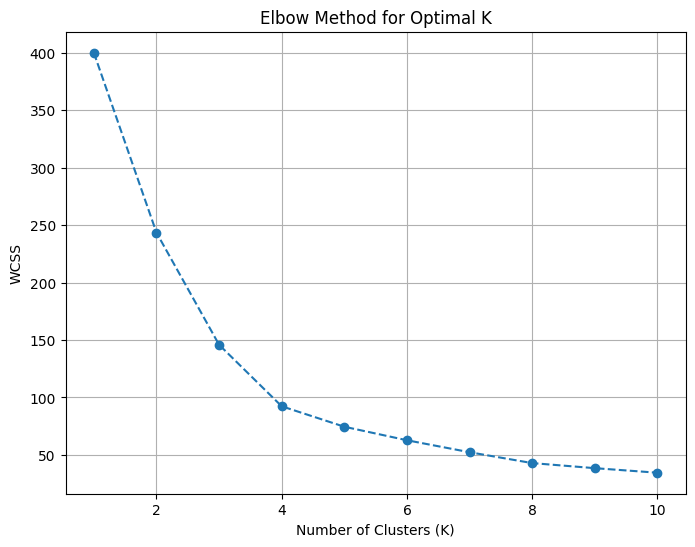

In [34]:
# ================================================================
# 5. ELBOW METHOD: Choosing the Optimal K
# ================================================================
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    model_k = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    model_k.fit(X_scaled)
    wcss.append(model_k.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Based on the curve shape, we select:
optimal_k = 5


In [35]:
# ================================================================
# 6. TRAINING THE K-MEANS MODEL
# ================================================================
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)

# Fit model and assign cluster labels
df["Cluster"] = kmeans.fit_predict(X_scaled)

df["Cluster"].value_counts()


,count
Cluster,
2,53
1,44
0,36
4,35
3,32


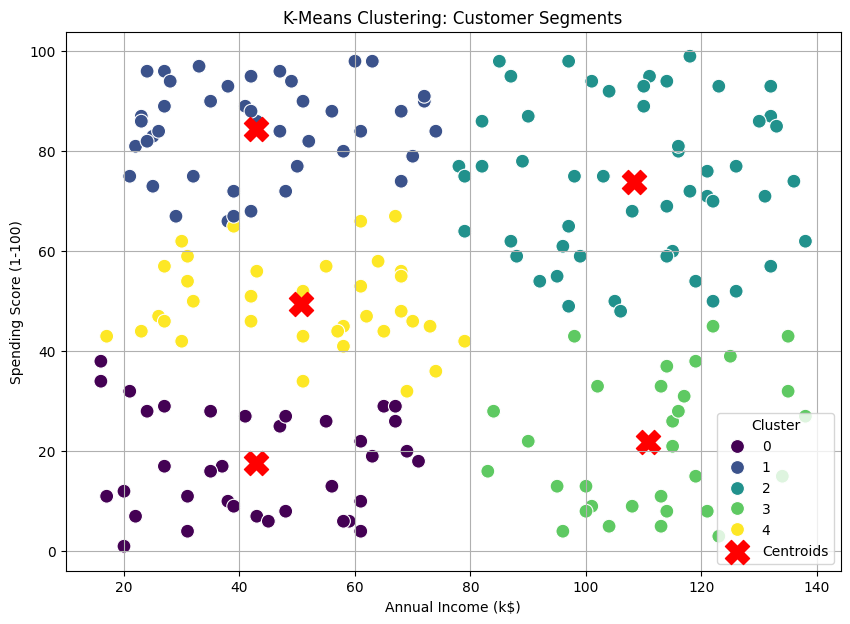

In [36]:
# ================================================================
# 7. VISUALIZING CUSTOMER SEGMENTS
# ================================================================
# Convert centroids back to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = centroids_scaled * scaler.scale_ + scaler.mean_

plt.figure(figsize=(10, 7))

sns.scatterplot(
    x="Annual_Income_k",
    y="Spending_Score",
    hue="Cluster",
    data=df,
    palette="viridis",
    s=100
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c="red",
    marker="X",
    label="Centroids"
)

plt.title("K-Means Clustering: Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


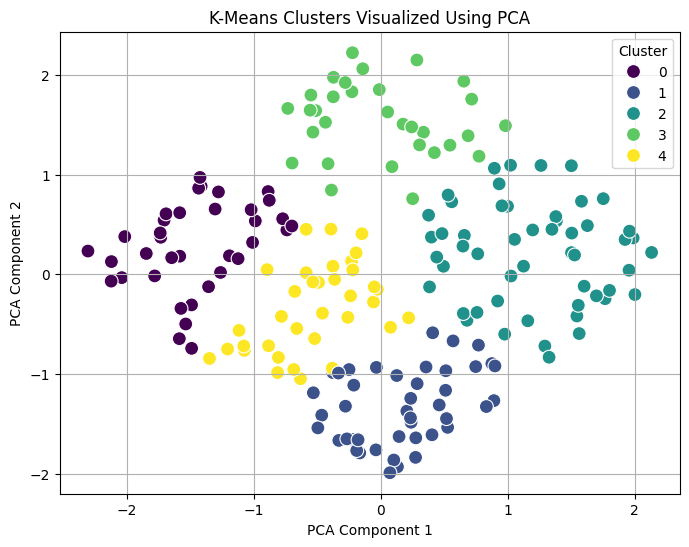

In [37]:
# ================================================================
# PCA VISUALIZATION (2D)
# ================================================================
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA outputs to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette="viridis",
    s=100
)

plt.title("K-Means Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


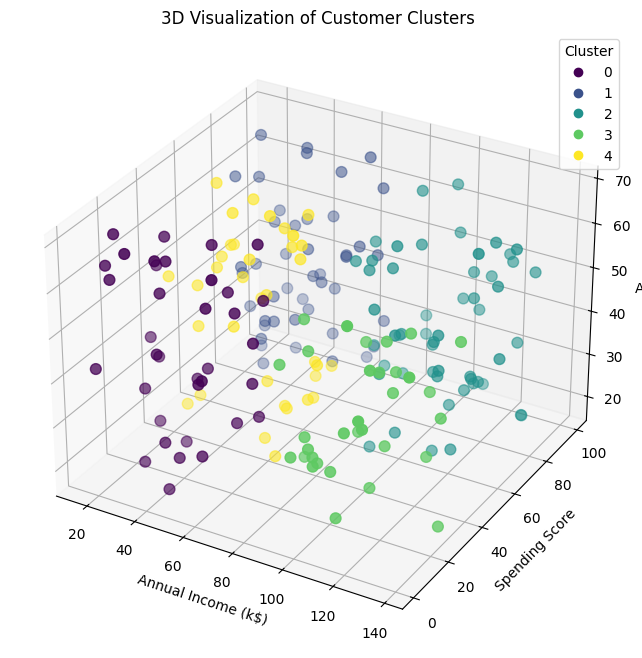

In [38]:
# ================================================================
# 3D CLUSTERING VISUALIZATION
# ================================================================
from mpl_toolkits.mplot3d import Axes3D

# Use the original scale for Interpretation
X_3d = df[["Annual_Income_k", "Spending_Score", "Age"]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d["Annual_Income_k"],
    X_3d["Spending_Score"],
    X_3d["Age"],
    c=df["Cluster"],
    cmap="viridis",
    s=60
)

ax.set_title("3D Visualization of Customer Clusters")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Age")

plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()
